In [1]:
!pip install diffusers
!pip install accelerate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 29.9 MB/s eta 0:00:00


In [2]:
from diffusers import StableDiffusionImageVariationPipeline
from PIL import Image

device = "cuda:0"
sd_pipe = StableDiffusionImageVariationPipeline.from_pretrained(
  "lambdalabs/sd-image-variations-diffusers",
  revision="v2.0",
  )
sd_pipe = sd_pipe.to(device)

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

2024-04-19 06:57:48.602071: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-19 06:57:48.602202: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-19 06:57:48.761229: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


model_index.json:   0%|          | 0.00/545 [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors not found


Fetching 11 files:   0%|          | 0/11 [00:00<?, ?it/s]

unet/diffusion_pytorch_model.bin:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

image_encoder/config.json:   0%|          | 0.00/703 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/518 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/5.01k [00:00<?, ?B/s]

image_encoder/pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/871 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/284 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/595 [00:00<?, ?B/s]

safety_checker/pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

vae/diffusion_pytorch_model.bin:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

/opt/conda/lib/python3.10/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


In [3]:
from torchvision import transforms

im = Image.open("/kaggle/input/images/PRINT PAGE-CU8439.jpg")
tform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize(
        (224, 224),
        interpolation=transforms.InterpolationMode.BICUBIC,
        antialias=False,
        ),
    transforms.Normalize(
      [0.48145466, 0.4578275, 0.40821073],
      [0.26862954, 0.26130258, 0.27577711]),
])
inp = tform(im).to(device).unsqueeze(0)


  0%|          | 0/50 [00:00<?, ?it/s]

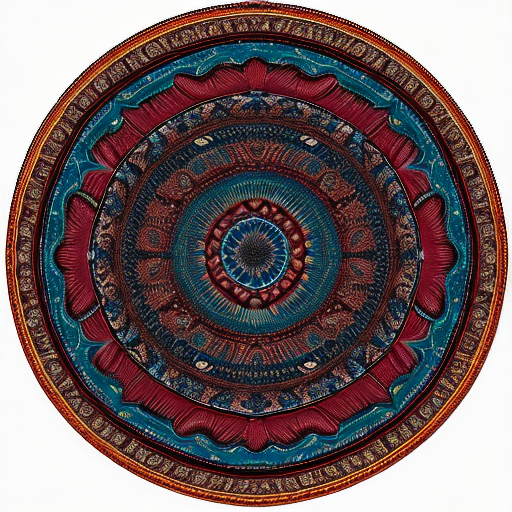

In [4]:
from diffusers.utils import load_image, make_image_grid
out = sd_pipe(inp,guidance_scale=5).images[0]
out

In [5]:
from torchvision import transforms

im = Image.open("/kaggle/input/images/80403031-PP.jpg")
tform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize(
        (224, 224),
        interpolation=transforms.InterpolationMode.BICUBIC,
        antialias=False,
        ),
    transforms.Normalize(
      [0.48145466, 0.4578275, 0.40821073],
      [0.26862954, 0.26130258, 0.27577711]),
])
inp = tform(im).to(device).unsqueeze(0)

  0%|          | 0/50 [00:00<?, ?it/s]

Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.


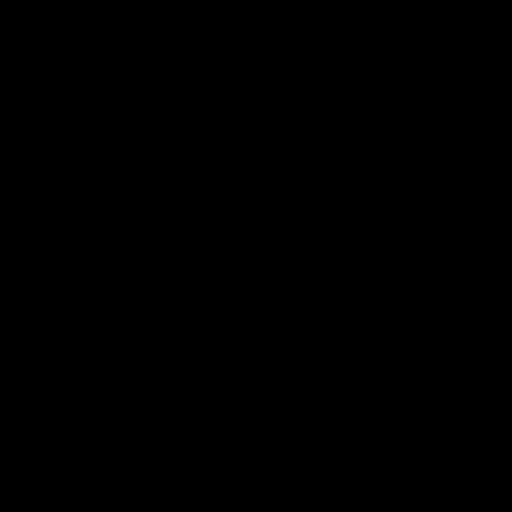

In [6]:
out = sd_pipe(inp, guidance_scale=1).images[0]
out

  0%|          | 0/50 [00:00<?, ?it/s]

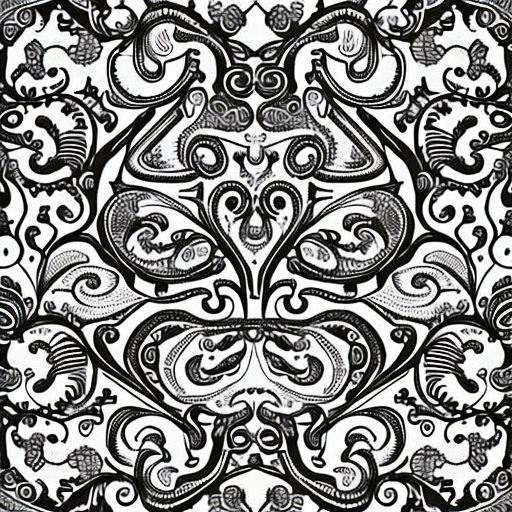

In [7]:
out = sd_pipe(inp, guidance_scale=3).images[0]
out

In [8]:
from torchvision import transforms

im = Image.open("/kaggle/input/images/281.jpg")
tform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize(
        (224, 224),
        interpolation=transforms.InterpolationMode.BICUBIC,
        antialias=False,
        ),
    transforms.Normalize(
      [0.48145466, 0.4578275, 0.40821073],
      [0.26862954, 0.26130258, 0.27577711]),
])
inp = tform(im).to(device).unsqueeze(0)

  0%|          | 0/50 [00:00<?, ?it/s]

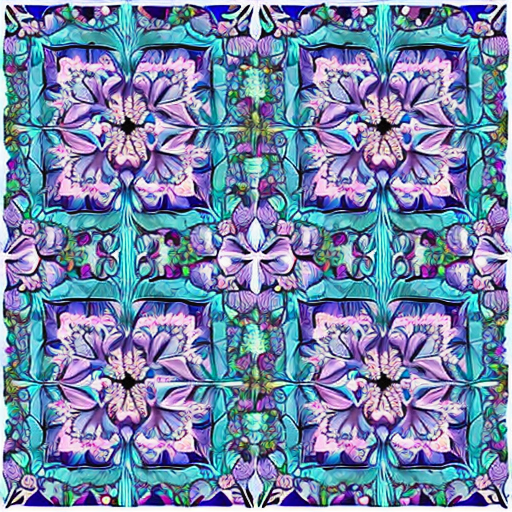

In [9]:
out = sd_pipe(inp, guidance_scale=3).images[0]
out

In [10]:
from torchvision import transforms

im = Image.open("/kaggle/input/images/PRINT PAGE-CU8439.jpg")
tform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize(
        (224, 224),
        interpolation=transforms.InterpolationMode.BICUBIC,
        antialias=False,
        ),
    transforms.Normalize(
      [0.48145466, 0.4578275, 0.40821073],
      [0.26862954, 0.26130258, 0.27577711]),
])
inp = tform(im).to(device).unsqueeze(0)

  0%|          | 0/50 [00:00<?, ?it/s]

Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.


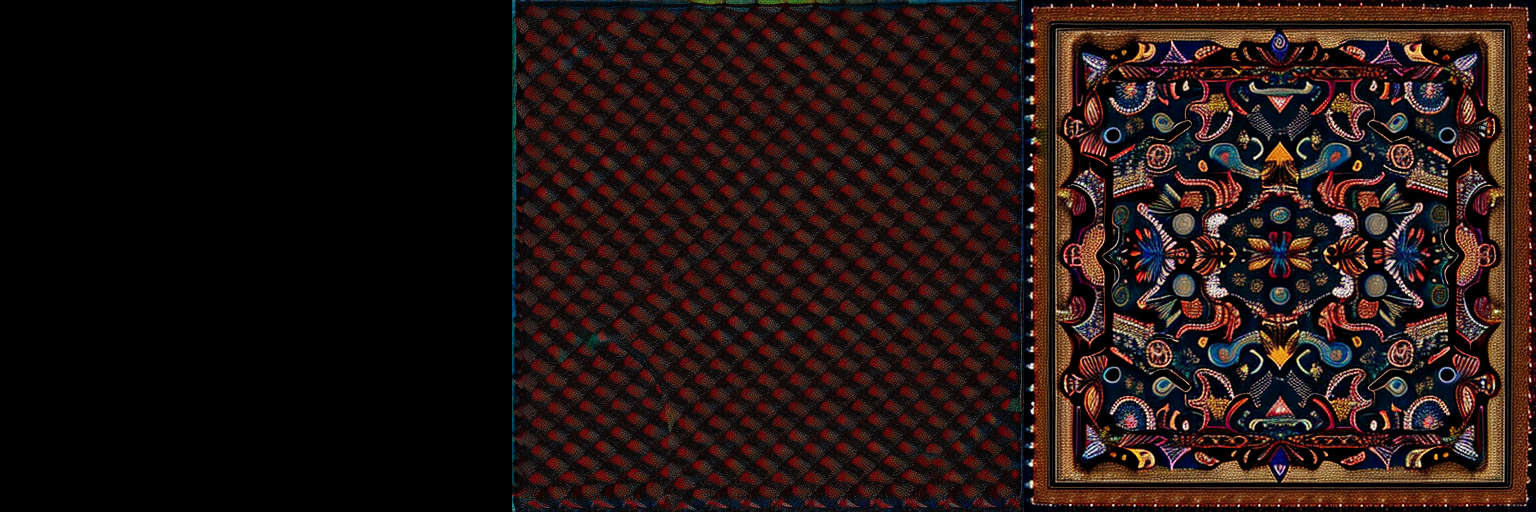

In [11]:
# Generate three variations
num_variations = 3
out = sd_pipe(inp, num_images_per_prompt=num_variations, guidance_scale=7.5)

# Prepare images for grid (including the input image)
images_for_grid = []  # Start with the original image
images_for_grid.extend(out["images"])  # Add generated images

# Make the grid
make_image_grid(images_for_grid, rows=1, cols=3)  # One row, four columns



In [12]:
from torchvision import transforms

im = Image.open("/kaggle/input/images/2822.jpg")
tform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize(
        (224, 224),
        interpolation=transforms.InterpolationMode.BICUBIC,
        antialias=False,
        ),
    transforms.Normalize(
      [0.48145466, 0.4578275, 0.40821073],
      [0.26862954, 0.26130258, 0.27577711]),
])
inp = tform(im).to(device).unsqueeze(0)

  0%|          | 0/50 [00:00<?, ?it/s]

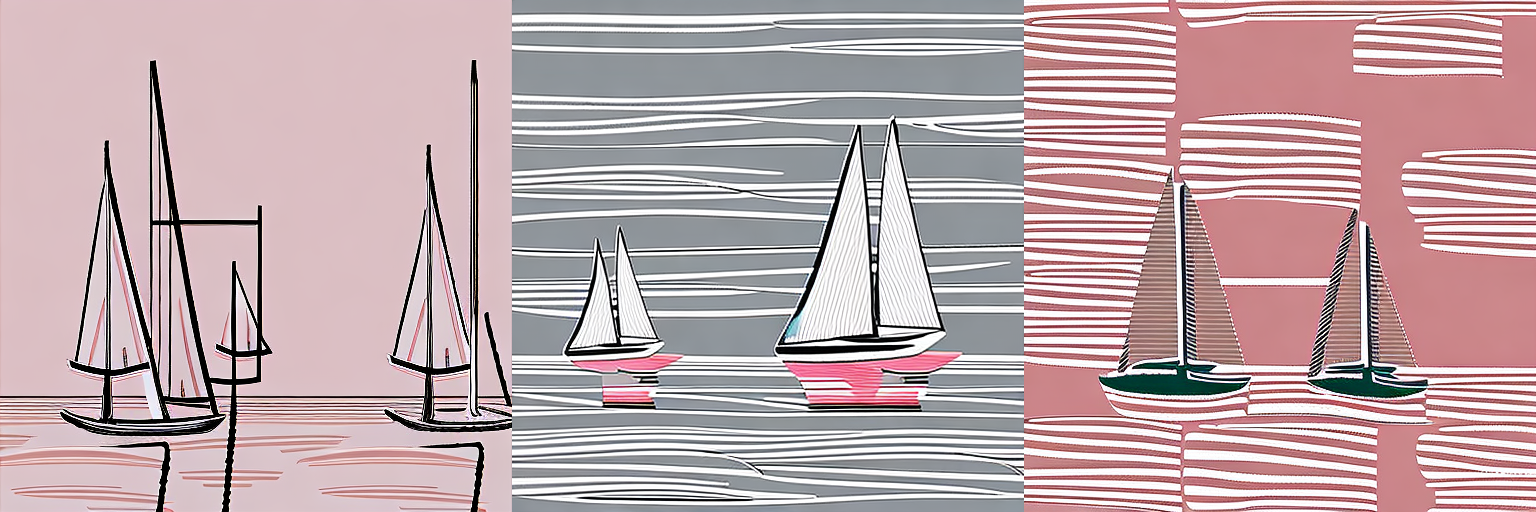

In [13]:
from diffusers.utils import load_image, make_image_grid
num_variations = 3
out = sd_pipe(inp, num_images_per_prompt=num_variations, guidance_scale=7.5)

# Prepare images for grid (including the input image)
images_for_grid = []  # Start with the original image
images_for_grid.extend(out["images"])  # Add generated images


# Make the grid
make_image_grid(images_for_grid, rows=1, cols=3)

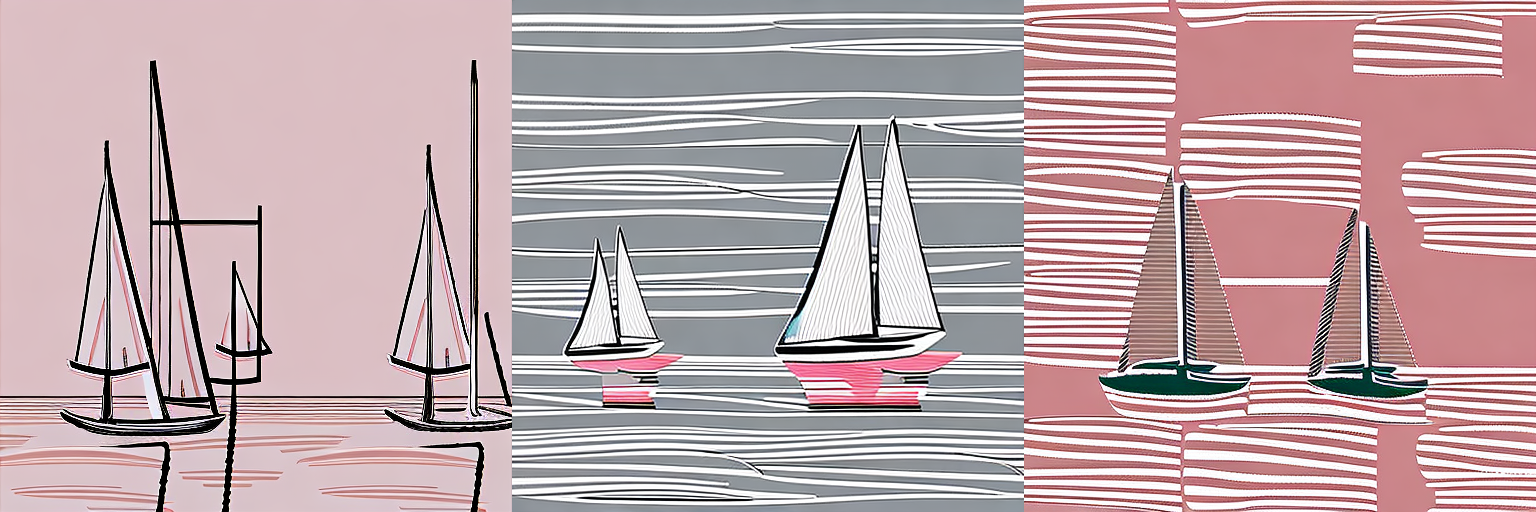

In [14]:
from diffusers.utils import load_image, make_image_grid
# Make the grid
make_image_grid(images_for_grid, rows=1, cols=3)

  0%|          | 0/50 [00:00<?, ?it/s]

Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.


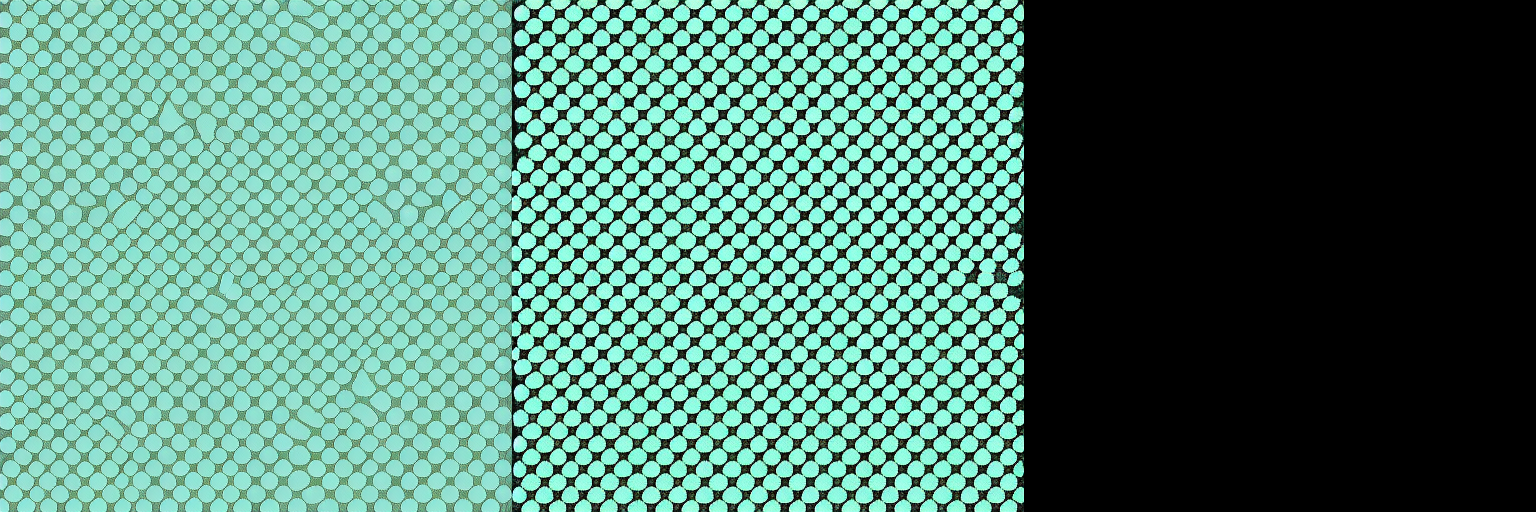

In [15]:
from torchvision import transforms
from diffusers.utils import load_image, make_image_grid

im = Image.open("/kaggle/input/images/1578.jpg")
tform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize(
        (224, 224),
        interpolation=transforms.InterpolationMode.BICUBIC,
        antialias=False,
        ),
    transforms.Normalize(
      [0.48145466, 0.4578275, 0.40821073],
      [0.26862954, 0.26130258, 0.27577711]),
])
inp = tform(im).to(device).unsqueeze(0)

num_variations = 3
out = sd_pipe(inp, num_images_per_prompt=num_variations, guidance_scale=7.5)

# Prepare images for grid (including the input image)
images_for_grid = []  # Start with the original image
images_for_grid.extend(out["images"])  # Add generated images


# Make the grid
make_image_grid(images_for_grid, rows=1, cols=3)

